<a href="https://colab.research.google.com/github/AllanRocha28/Data-Science/blob/public/Analisando_os_Dados_do_Airbnb_Bergamo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Bérgamo, Lombardia - Itália*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Bérgamo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Sobre Bérgamo**

Bérgamo é uma cidade italiana, província da região da Lombardia.

A cidade está dividida em duas distintas áreas: A Città Alta (cidade Alta), um centro histórico cercado por uma muralha, e a Città Bassa (Cidade Baixa) , uma região mais moderna, onde estão localizados os comércios, indústrias.

Apesar de não ser tão conhecida, quanto outras cidades italianas, Bérgamo apresenta diferentes pontos turísticos e belezas que estão atraindo e levando turistas a conhecer os encantos desse lindo lugar.

No estudo realizado, os dados coletados e apresentados, poderão auxiliar a você a conhecer um pouco mais sobre o funcionamento da plataforma do Airbnb na região, destacando as principais informações que você pode necessitar para se hospedar e explorar este lindo lugar.

<center><img alt="Bérgamo" width="75%" src="https://upload.wikimedia.org/wikipedia/commons/0/0c/Sunrise_at_Bergamo_old_town%2C_Lombardy%2C_Italy.jpg">
</center>

## Obtenção dos Dados


Os dados deste estudo foram baixados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a análise o arquivo baixado foi:

* `	listings.csv` - *Summary information and metrics for listings in Bergamo (good for visualisations).*

O site sofre constantes atualizações e por isso o arquivo utilizado neste estudo poderá ter sido alterado em algum outro momento. Pensando nisso, o arquivo utilizado nessa análise fica disponível para ser [baixado](https://www.dropbox.com/s/hhhclxvefqu5mla/listings.csv?dl=1).


In [ ]:
# importar os pacotes necessarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://www.dropbox.com/s/hhhclxvefqu5mla/listings.csv?dl=1")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - identificador do Airbnb para cada anúncio
* `name` - nome da propriedade
* `host_id` - identificação do Airbnb para o anfitrião
* `host_name` - nome do anfitrião
* `neighbourhood_group` - não há dados para esta variável
* `neighbourhood` - nome dos bairros
* `latitude` - posição geográfica da propriedade, em termos da sua latitude
* `longitude` - posição geográfica da propriedade, em termos da sua longitude
* `room_type` - tipo de imóvel para alugar
* `price` - preço da diária
* `minimum_nights` - número mínimo de noites para reservar
* `number_of_reviews` - número de *reviews* que a propriedade possui
* `last_review` - data da última revisão
* `reviews_per_month` - quantidade de *reviews* por mês
* `calculated_host_listings_count` - quantidade de propriedades de um mesmo anfitrão
* `availability_365` - número de dias disponíveis em 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos 12 meses para o imóvel
* `license` - número da licença, permisão ou registro do imóvel

Antes de iniciar qualquer análise, vamos verificar o *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15526,Residenza PALAZZO lake view,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78464,10.02629,Entire home/apt,119,3,37,2021-08-26,0.29,5,63,2,NaN
1,15542,Suite PANORAMA facing the lake,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78354,10.02471,Entire home/apt,87,3,42,2021-09-21,0.36,5,72,2,NaN
2,31412,Cute and Cosy Terrace,134937,Elena,NaN,Bergamo,45.69052,9.67099,Entire home/apt,64,1,93,2021-10-05,0.78,10,1,14,NaN
3,116423,Casetta a 12km da lago d'iseo,588254,Angela,NaN,Bossico,45.82840,10.04476,Entire home/apt,62,7,8,2019-11-03,0.18,3,292,0,CIR 016033-CNI-00002T00146
4,179345,Bossico Vicino a Montisola e lago D'iseo,588254,Angela,NaN,Bossico,45.82723,10.04484,Entire home/apt,60,7,11,2021-09-30,0.25,3,292,1,CIR 016033-CNI-00002T00146


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para o conjunto de dados escolhidos, `listing.csv`, que é um *Summary* há 18 variáveis no dataset e 2243 valores de entradas. 

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 2243
Variáveis: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Saber a quantidade de valores nulos em um dataset é importante para saber quais variáveis não iremos considerar na análise.

* `neighbourhood_group` - não possui valor nenhum, 100% dos valores estão faltando.
* `license` - tem 81% de valores nulos.
* `reviews_per_month` e `last_review` as duas variáveis apresentam a mesma quantidade de valores faltantes, quase 21%.

A variável `host_name` é a ultima que apresenta valores faltantes: 0,09%; como o valor é baixo ela pode ser considerada na análise.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.812751
reviews_per_month                 0.205974
last_review                       0.205974
host_name                         0.000892
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para observar melhor as variáveis numéricas do dataset, será feito um histograma destas.

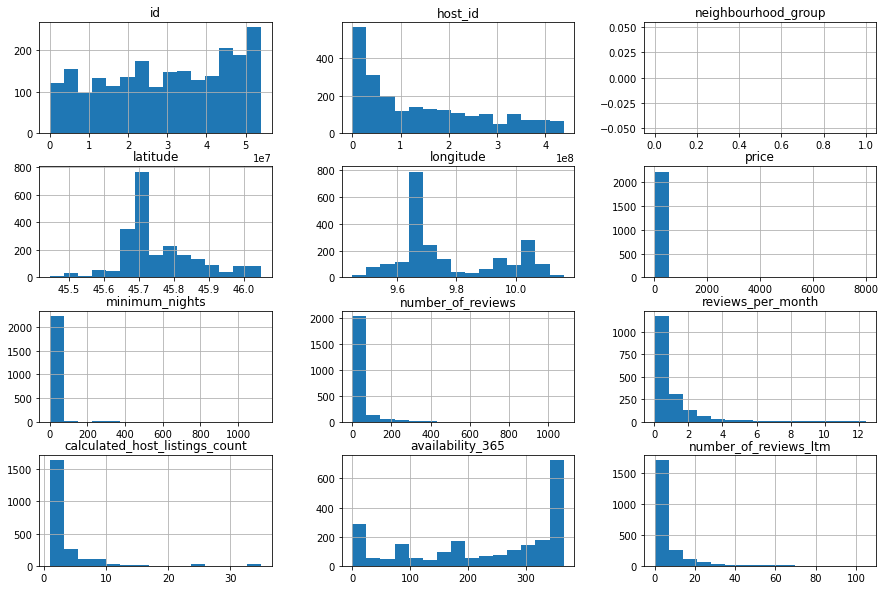

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

A partir dos histogramas plotados podem ser observados valores de *outliers* para as variáveis `price`, `minimum_nights` e `calculated_host_listings_count` e que será necessário retirá-los do dataset de forma que estes não influenciem na avaliação.

Será realizado um resumo estatístico e boxplots dessas variáveis para observar melhor a influência dos *outliers*.

In [ ]:
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,2243.000000,2243.000000
mean,125.484619,4.594739
std,498.085691,30.844063
min,9.000000,1.000000
25%,50.000000,1.000000
50%,70.000000,2.000000
75%,104.500000,3.000000
max,7999.000000,1124.000000


Pode ser observado que 75% dos valores para a variável `price` estão abaixo de 104,5 euros e que 75% das pessoas não alugam mais que 3 noites.
Também observa-se que os valores máximos para `price` e `minimum_nights` são 7.999,00 euros e 1124 dias, respectivamente.

#### Boxplots

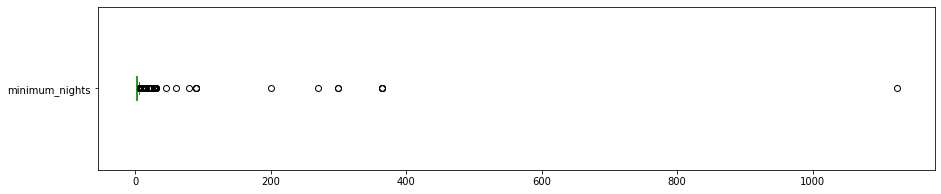

minimum_nights: > 30 dias:
18 entradas
0.8025%


In [ ]:
# Boxplot minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Quantidade de valores acima de 30 dias e sua porcentagem nos dados
print("minimum_nights: > 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]*100)))

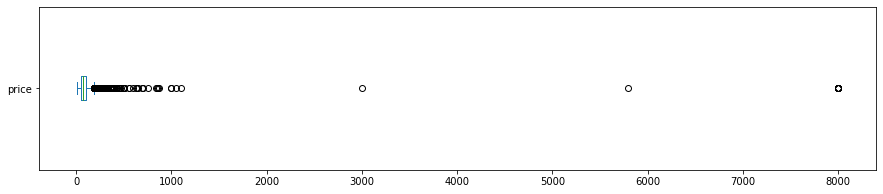

price: acima de 650 euros
21 entradas
0.9362%


In [ ]:
# Boxplot price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Valores acima de 650 euros 
print("price: acima de 650 euros")
print("{} entradas".format(len(df[df.price > 650])))
print("{:.4f}%".format((len(df[df.price > 650]) / df.shape[0]*100)))

Vemos que para a variável `minimum_nights` há 18 valores para reservas acima de 30 dias, o que representa 0,80% dos valores do dataset, e que para a variável `price` há 21 valores, 0,94%, acima de 650 euros.

Essas informações auxiliam em quais pontos podem ser feitas as retiradas dos *outliers*.

#### Limpando o Dataset

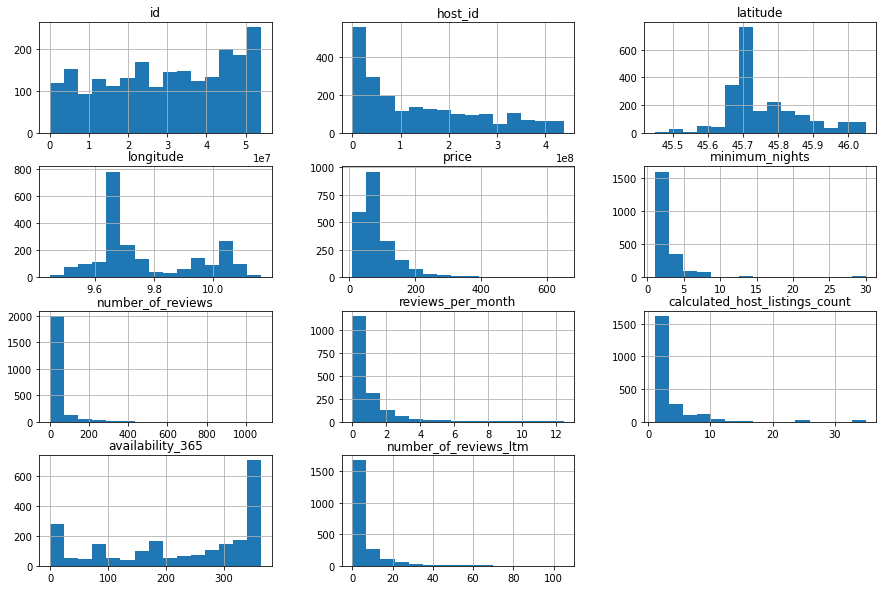

In [ ]:
# Removendo os outliers
df_clear = df.copy()
df_clear.drop(df_clear[df_clear.price > 650].index, axis=0, inplace=True)
df_clear.drop(df_clear[df_clear.minimum_nights > 30].index, axis=0, inplace=True)

# Como o neighbourhood_group está vazio, iremos excluí-lo
df_clear.drop('neighbourhood_group', axis=1, inplace=True)

# Plotando o histograma com as modificações feitas
df_clear.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price`
print("média_price:")
df_clear['price'].mean()

média_price:


89.6882940108893

Nota-se a influência dos *outliers* na variável `price` ao comparar o valor da média antes, 125,50 euros, e depois, 89,70, da limpeza do *dataset*, uma diferença de 28,5%.

### **Q5. Qual a correlação existente entre as variáveis**

A correlação expressa se há ou não uma relação entre duas ou mais variáveis. A partir do gráfico de *heatmap* é possível ver essas relações de forma rápida.

In [ ]:
# criar uma matriz de correlação
correlacao = df_clear[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display (correlacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.085811,-0.120254,-0.141607,0.211771,0.138278
minimum_nights,-0.085811,1.000000,-0.116380,-0.159843,-0.055715,-0.028326
number_of_reviews,-0.120254,-0.116380,1.000000,0.678447,-0.065643,0.008481
reviews_per_month,-0.141607,-0.159843,0.678447,1.000000,-0.030946,0.069887
calculated_host_listings_count,0.211771,-0.055715,-0.065643,-0.030946,1.000000,0.157410
availability_365,0.138278,-0.028326,0.008481,0.069887,0.157410,1.000000


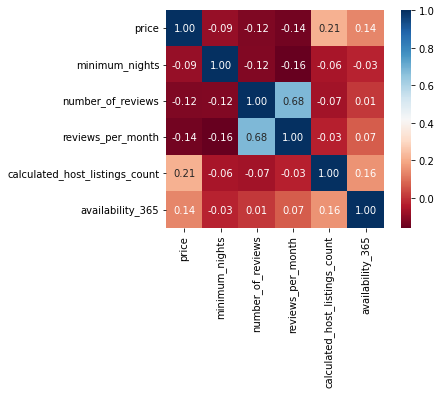

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Conforme pode ser visto, não há nenhuma forte correlação entre as variáveis númericas com as quais podem ser obtidas informações úteis.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

O Airbnb dá várias opções de reservas, a variável `room_type` apresenta os tipos de imóveis.

Abaixo vemos a quantidade de reservas feitas em cada tipo imóvel. 

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clear.room_type.value_counts()

Entire home/apt    1690
Private room        470
Hotel room           35
Shared room           9
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clear.room_type.value_counts() / df_clear.shape[0]

Entire home/apt    0.766788
Private room       0.213249
Hotel room         0.015880
Shared room        0.004083
Name: room_type, dtype: float64

Os principais tipos de imóveis reservados são casas ou apartamentos inteiros, 76,6%, e o segundo são quartos privados, 21,3%.

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clear.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Almenno San Salvatore    500.000000
Lurano                   330.000000
Olmo al Brembo           250.000000
Bianzano                 219.333333
Mezzoldo                 207.000000
Foresto Sparso           204.000000
Gandino                  200.000000
Roncola                  176.434783
Sant'Omobono Terme       161.750000
Bonate Sotto             156.000000
Name: price, dtype: float64

Acima é apresentado os 10 bairros com os maiores valores médios.

Devido ao desconhecimento da região não é possível dizer se esses valores são representativos desses bairros, dessa forma é necessário saber o quanto esses imóveis são representativos, conforme abaixo.

In [ ]:
print(df_clear[df_clear.neighbourhood == "Almenno San Salvatore"].shape)

df_clear[df_clear.neighbourhood == "Almenno San Salvatore"]

(1, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
167,4676241,Villa Vitalba-1700s house and winery 1h from M...,1853625,Carola,Almenno San Salvatore,45.749252,9.58557,Entire home/apt,500,2,41,2021-11-07,0.51,1,180,5,NaN


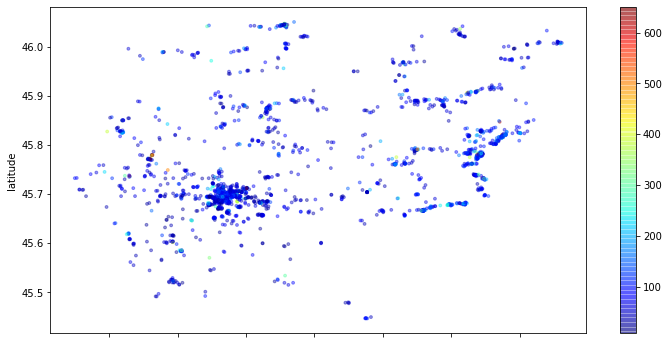

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clear.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clear['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 6));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df_clear['minimum_nights'].mean()

2.7327586206896552

## **Conclusões**

Nesta estudo foi possível ver como os valores de *outliers* pesavam na análise de algumas variáveis como `price` e `minimum_nights`, sendo necessário realizar uma limpeza no dataframe antes prosseguirmos.

A análise trata-se de uma abordagem inicial, uma vez que o arquivo utilizado é um resumo de um dataframe mais completo.
